In [1]:
from core import history as ch
from core.fine_model import FineModel
import matplotlib as mpl
import matplotlib.pyplot as plt
import traceback
import warnings
import os

Using TensorFlow backend.


In [2]:
_depth_key = 'EXP{:02}_D{:02}'
_fold_key = 'EXP{:02}_D{:02}_L{:02}_F{:02}'
_epoch_key = 'EXP{:02}_D{:02}_L{:02}_F{:02}_E{:03}'

In [21]:
metric_names = {
    'val_loss': 'Validation Loss',
    'loss': 'Training Loss',
    'val_acc': 'Validation Accuracy',
    'acc': 'Training Accuracy',
}


def plot_average_by_fold(histories, title=None, ax=None, metric='val_loss'):
    """
    ax: matplotlib.Axes on which to plot the figure
    """
    if metric not in metric_names.keys():
        warnings.warn('Metric "{}" not in metrics. Select one of the following: {}'.format(metric, metric_names.keys()))
        traceback.print_exc()
        fig = plt.Figure()
        return fig
    
    metric_name = metric_names[metric]

    _fold_label = 'Fold #{}'
    avg_label = 'K-Fold Average'
    figsize=(6, 6)
    fold_alpha = 0.5
    xlabel = 'Epochs'
    ylabel = metric_name
    
    if ax is None:
        fig, ax = plt.subplots(squeeze=True, figsize=figsize)
    
    if title is not None:
        ax.set_title(title)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for history in histories:
        ax.plot(history.index, history[metric], alpha=fold_alpha, label=_fold_label.format(k + 1))

    avg = ch.get_average(histories)[metric]
    ax.plot(avg, label=avg_label)
    ax.legend(loc='upper left')
    
    return ax

In [11]:
metric_names = {
    'val_loss': 'Validation Loss',
    'loss': 'Training Loss',
    'val_acc': 'Validation Accuracy',
    'acc': 'Training Accuracy',
}


def plot_average_by_lr(history_by_lr, title=None, ax=None, metric='val_loss'):
    """
    history_by_lr: {
        '0.001': list_of_history_dataframes,
        '0.0001': ...,
        ...,
    }
    ax: matplotlib.Axes on which to plot the figure
    """
    if metric not in metric_names.keys():
        warnings.warn('Metric "{}" not in metrics. Select one of the following: {}'.format(metric, metric_names.keys()))
        traceback.print_exc()
        fig = plt.Figure()
        return fig
    
    metric_name = metric_names[metric]

    _fold_label = 'Fold #{}'
    figsize=(6, 6)
    xlabel = 'Epochs'
    ylabel = metric_name
    
    if ax is None:
        fig, ax = plt.subplots(squeeze=True, figsize=figsize)
    
    if title is not None:
        ax.set_title(title)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for lr, history in history_by_lr.items():
        ax.plot(history.index, history[metric], label=lr)

    return ax

In [4]:
fm = FineModel.get_dict()['mobileneta25']()

Learning Rates: [0.01, 0.001, 0.0001]


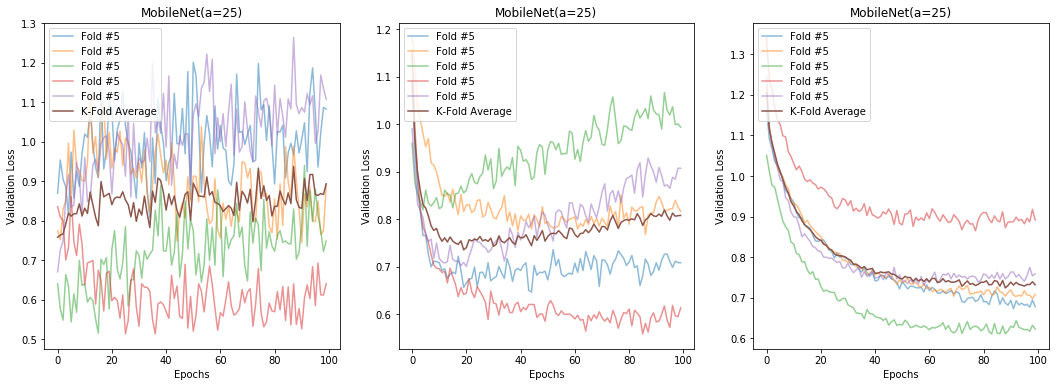

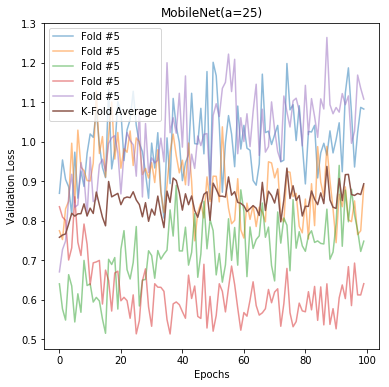

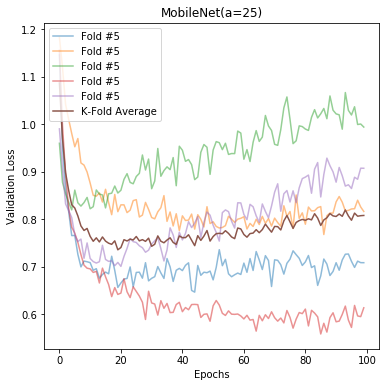

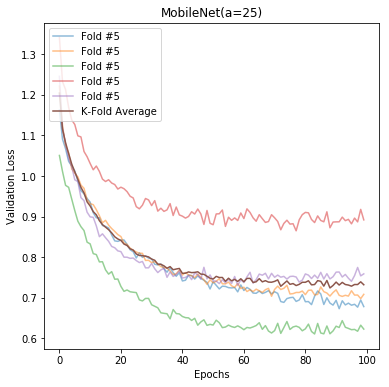

In [28]:
EXP = 1
K = 5

verbose_model_name = 'MobileNet(a=25)'
model_name = fm.get_name()
lr_list = [
    0.01,
    0.001,
    0.0001,
]

title = verbose_model_name
depth_index = 0
metric = 'val_loss'

print('Learning Rates: {}'.format(lr_list))

fig, axes = plt.subplots(1, 3, squeeze=True, figsize=(18, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    histories = list()
    for k in range(K):
        fold_key = _fold_key.format(EXP, depth_index, i, k)
        history = ch.load_history(model_name, fold_key)
        histories.append(history)
    path = 'Fold Average [{}][LR={:.1E}][FM={}].png'.format(metric.upper(), lr, model_name)
    plot_average_by_fold(histories, title=verbose_model_name, metric=metric, ax=ax)  # for Jupyter
    single_ax = plot_average_by_fold(histories, title=verbose_model_name, metric=metric)
    single_ax.get_figure().savefig(path, dpi=320, bbox_inches='tight')